# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [35]:
!g++ -o tp_openmp_part_1_pi tp_openmp_part_1_pi.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_11_critical tp_openmp_part_11_critical.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_12_atomic tp_openmp_part_12_atomic.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_13_reduction tp_openmp_part_13_reduction.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_14_array tp_openmp_part_14_array.cpp -fopenmp -O3 -march=native

### Evaluation des performance en fonction du nombre de steps 

In [18]:
import os
import subprocess

try:
    os.remove("stats_pi.csv")
except OSError:
    pass

num_steps = [1000000, 100000000, 10000000000]#, 1000000000000]
nb_core = [1, 2, 4, 8]
repeats = range(0,10)

for nsteps in num_steps:
    for ncore in nb_core:
        args = ("./tp_openmp_part_1_pi", "-C", str(ncore), "-N", str(nsteps))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("./tp_openmp_part_11_critical", "-C", str(ncore), "-N", str(nsteps))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("./tp_openmp_part_12_atomic", "-C", str(ncore), "-N", str(nsteps))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("./tp_openmp_part_13_reduction", "-C", str(ncore), "-N", str(nsteps))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("./tp_openmp_part_14_array", "-C", str(ncore), "-N", str(nsteps))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()



            

KeyboardInterrupt: 

### Affichage graphique des performances

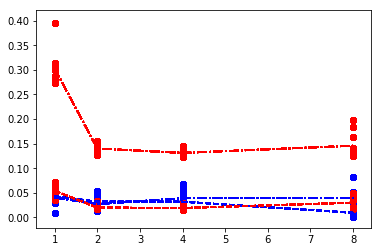

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('stats_pi.csv',header=None,names=['version','nbcore','num_steps','runtime'],dtype={
                     'version': str,
                     'nbcore': int,
                     'num_steps' : int,
                     'runtime' : float
                 })

color_num_steps = {1000000 : "blue", 100000000 : "red", 10000000000 : "green", 1000000000000 : "black"}

for num_steps in df['num_steps']:

   df_plot = df[(df['num_steps'] == int(num_steps))]
   df_plot = df_plot[df_plot['version'] == "atomic"]
    
   mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
   plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="solid",color=color_num_steps[num_steps])
 #   plt.yscale('log')
 #   plt.xscale('log')
   plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

    
    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "reduce")]
    mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps])
    plt.yscale('log')
 #   plt.xscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "critical")]
    mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dotted",color=color_num_steps[num_steps])
    plt.yscale('log')
 #   plt.xscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "array")]
    mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dashdot",color=color_num_steps[num_steps])
    plt.yscale('log')
 #   plt.xscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])
    


   
plt.show()

In [ ]:


    plt.legend()

### Conclusion

.....

## Part 2 : Matrix-Vector operation

### Compilation

In [ ]:
!g++ -o tp_openmp_part_2_vector tp_openmp_part_2_vector.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_25_pragma tp_openmp_part_25_pragma.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_29_SIMD tp_openmp_part_29_SIMD.cpp -fopenmp -O3 -march=native

### Evaluation des performences

avec :
* N : 2, 4, 8, 10, 12, 14, 16
* M : 1, 3, 7, 9, 11, 13, 15

In [ ]:
import os
import subprocess

try:
    os.remove("stats_vector.csv")
except OSError:
    pass

array_N = [2, 4, 8, 10, 12, 14, 16]
array_M = [1, 3, 7, 9, 11, 13, 15]
ncore = 4

for N in array_N:
    for M in array_M:
        args = ("./tp_openmp_part_21_sequential {N} {M}", "-C", str(ncore))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("./tp_openmp_part_25_pragma {N} {M}", "-C", str(ncore))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("./tp_openmp_part_21_SIMD {N} {M}", "-C", str(ncore))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()
        


### Conculsion

* Sequential

* Pragma

* SIMD Pragma

### Performance evaluation

In [ ]:
import os
import subprocess

try:
    os.remove("stats.csv")
except OSError:
    pass

num_steps = [1000000, 100000000, 10000000000]#, 1000000000000]
nb_core = [1, 2, 4, 8]
repeats = range(0,10)

for nsteps in num_steps:
    for ncore in nb_core:
        for repeat in repeats:
            args = ("./tp_openmp_part_1_pi_impl_reduce", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./tp_openmp_part_1_pi_impl_atomic", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()



### Performance analysis
#### Weak scaling

No handles with labels found to put in legend.


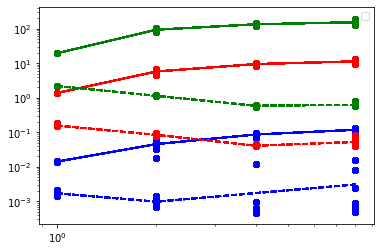

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('stats.csv',header=None,names=['version','nbcore','num_steps','runtime'],dtype={
                     'version': str,
                     'nbcore': int,
                     'num_steps' : int,
                     'runtime' : float
                 })

color_num_steps = {1000000 : "blue", 100000000 : "red", 10000000000 : "green", 1000000000000 : "black"}

for num_steps in df['num_steps']:
    df_plot = df[(df['num_steps'] == int(num_steps))]
    df_plot = df_plot[df_plot['version'] == "atomic"]
    
    mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="solid",color=color_num_steps[num_steps])
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "reduce")]
    mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps])
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])
    
plt.legend()
plt.show()

#### Strong Scaling

### Discussion